In [117]:
import pandas as pd
df=pd.read_csv("GAA_pset_ID.csv")

In [118]:
def goal(a,b):
    return (a-b)/a
def label(row):
    temp = max(goal(row["WEMP"], 1950), 0) +max(goal(row["DOC"], 60), 0)+max(goal(row["WFUEL"], 400), 0)+max(goal(row["PURCH"], 42000), 0)+max(goal(row["RANGE"], -2500), 0)+max(goal(row["LDMAX"], -17), 0)+max(goal(row["WEMP"], -200), 0)
    return temp/7
    
df['performance'] = df.apply (lambda row: label(row), axis=1)

In [119]:
df['performance']

0      0.178453
1      0.176136
2      0.175181
3      0.190515
4      0.178749
         ...   
994    0.185730
995    0.187666
996    0.184640
997    0.180512
998    0.187720
Name: performance, Length: 999, dtype: float64

In [120]:
min(df['performance'])

0.16570696048229072

In [121]:
df.loc[df['performance'] == min(df['performance'])]

,ID,NOISE,WEMP,DOC,ROUGH,WFUEL,PURCH,RANGE,LDMAX,VCMAX,PFPF,performance
864,864,73.811076,1958.342857,61.111825,1.997429,387.750744,43539.92485,-2159.880408,-15.151832,-192.502666,0.923319,0.165707


I chose ID 864 as the solution since it has the overall minimize performance measurement. As expected, the solution has most objective value that is pretty close to the goal metric provided.


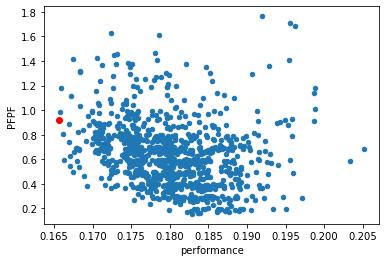

In [122]:
import matplotlib.pyplot as plt
df.plot(x="performance", y="PFPF", kind = "scatter")
plt.plot(0.165707, 0.923319,'ro')

b. The red dot is the chosen solution. There seems to be a tradeoff between PFPF and the goal programming performance in the lower left corner. 

c. The goal solution seems to lie on the Pareto Front in the lower left corner. The location means that our a priori method of minimizing both objectives is quite effective. 

In [123]:
import pandas as pd
df1=pd.read_csv("GAA_pset.csv")
df1.loc[(df1["NOISE"]<73.6) & (df1["WEMP"]<1960) & (df1["DOC"]<68.9)
        & (df1["ROUGH"]<1.9) & (df1["WFUEL"] < 423) & (df1["PURCH"] < 43250) 
        & (df1["RANGE"]<-2217) & (df1["LDMAX"] <-15.4 )& (df1["VCMAX"] <-195.1 )
        & (df1["PFPF"]<1)]
        

,NOISE,WEMP,DOC,ROUGH,WFUEL,PURCH,RANGE,LDMAX,VCMAX,PFPF


There is no aircraft that can meet all these criteria, so I would advise the executive to either scale down the requirements or deleting less important criteria. 

# Sensitivity Analysis OAT



In [146]:
import math
def fun(x1, x2, x3):
    return math.sin(x1) + 7* (math.sin(x2))**2 + 0.1* x3**4 * math.sin(x3)

In [154]:
fun(1+0.1,1,1)

5.931868386457223

In [161]:
sens1 = (fun(1+0.1,1,1)-fun(1,1,1))/0.1
sens2 = (fun(1,1+0.1,1)-fun(1,1,1))/0.1
sens3 = (fun(1,1,1+0.1)-fun(1,1,1))/0.1

In [162]:
print(sens1, sens2, sens3)

0.4973637525353869 6.032399824787129 0.4633457110580519


x2 seems to be the most influential of all three. 

# Global sensitivity


In [165]:
from SALib.analyze import sobol
from SALib.sample import saltelli

In [175]:
from SALib.test_functions import Ishigami

import numpy as np
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159, 3.14159],
    [-3.14159, 3.14159],
    [-3.14159, 3.14159]]
}


param_values = saltelli.sample(problem, 1000)


Y = Ishigami.evaluate(param_values)


Si = sobol.analyze(problem, Y, print_to_console=True)


Parameter S1 S1_conf ST ST_conf
x1 0.312346 0.063614 0.554344 0.086921
x2 0.442995 0.045276 0.437538 0.037769
x3 0.009031 0.059182 0.245577 0.028560

Parameter_1 Parameter_2 S2 S2_conf
x1 x2 0.010274 0.083334
x1 x3 0.237711 0.101215
x2 x3 -0.014603 0.069666
